# Titanic Survival Classification

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv(r"C:\Users\Public\Downloads\Data Science Internship ArchTechnologies\Titanic Dataset\train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().style.background_gradient(cmap='viridis')

## Exploratory Data Analysis (EDA)

<Axes: xlabel='Survived', ylabel='count'>

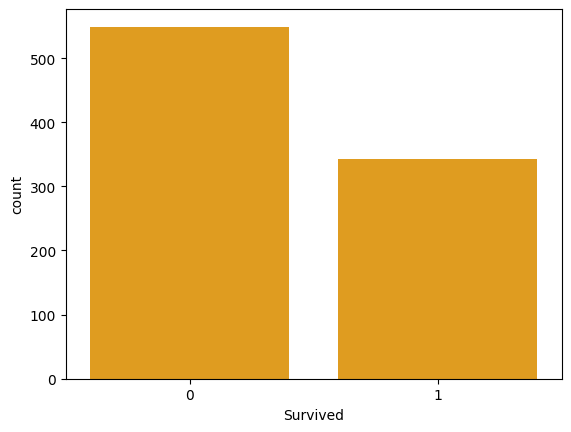

In [22]:
sns.countplot(x='Survived', color='orange', data=df)

<Axes: xlabel='Sex', ylabel='count'>

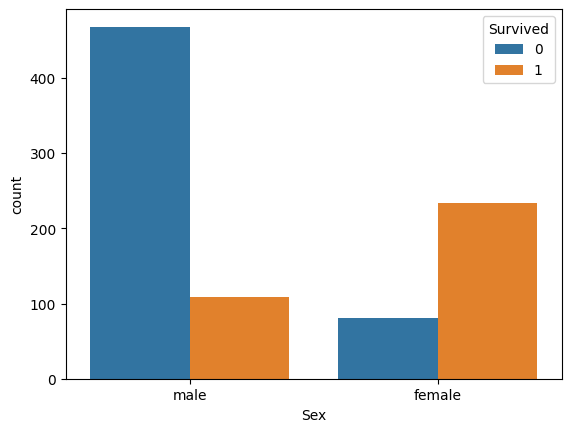

In [7]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

## Data Cleaning

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Encoding Categorical Data

In [13]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})
df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500         2
1           1       1    1  38.0      1      0  71.2833         0
2           1       3    1  26.0      0      0   7.9250         2
3           1       1    1  35.0      1      0  53.1000         2
4           0       3    0  35.0      0      0   8.0500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000         2
887         1       1    1  19.0      0      0  30.0000         2
888         0       3    1  28.0      1      2  23.4500         2
889         1       1    0  26.0      0      0  30.0000         0
890         0       3    0  32.0      0      0   7.7500         1

[891 rows x 8 columns]

## Correlation

<Axes: >

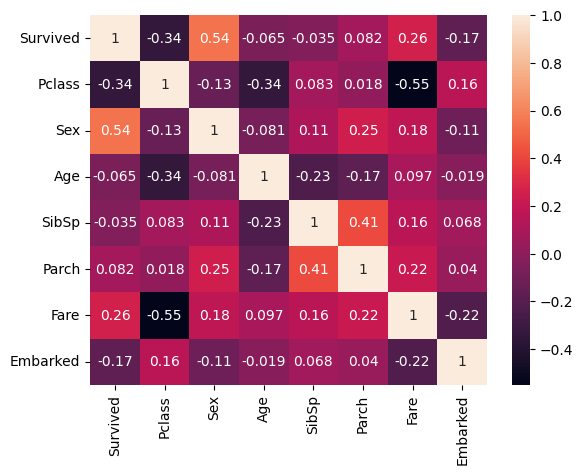

In [14]:
sns.heatmap(df.corr(), annot=True)

## Data Splitting

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y


(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0         3    0  22.0      1      0   7.2500         2
 1         1    1  38.0      1      0  71.2833         0
 2         3    1  26.0      0      0   7.9250         2
 3         1    1  35.0      1      0  53.1000         2
 4         3    0  35.0      0      0   8.0500         2
 ..      ...  ...   ...    ...    ...      ...       ...
 886       2    0  27.0      0      0  13.0000         2
 887       1    1  19.0      0      0  30.0000         2
 888       3    1  28.0      1      2  23.4500         2
 889       1    0  26.0      0      0  30.0000         0
 890       3    0  32.0      0      0   7.7500         1
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

## Model Training


In [17]:
# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Predictions

In [18]:
y_pred = model.predict(X_test)

## Accuracy

In [19]:
accuracy_score(y_test, y_pred)

0.8100558659217877

### confusion_matrix

In [20]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [19, 55]], dtype=int64)

### classification_report

In [21]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

## Summary

- The model used: **Logistic Regression**
- Achieved accuracy: **78.3%**
- Important factors affecting survival:
  - **Gender** (Females had higher survival)
  - **Passenger Class** (1st class had better survival)
  - **Fare** (Higher fare linked with survival)